### BAGGING

In [11]:
import seaborn
dataset=seaborn.load_dataset('tips')

In [12]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
dataset['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [14]:
dataset.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder=LabelEncoder()

In [21]:
encoder.fit_transform(dataset['time'])
# convert categorical data into numeric data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [18]:
dataset['time']=encoder.fit_transform(dataset['time'])

In [19]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,0,2
1,10.34,1.66,Male,No,Sun,0,3
2,21.01,3.50,Male,No,Sun,0,3
3,23.68,3.31,Male,No,Sun,0,2
4,24.59,3.61,Female,No,Sun,0,4


In [22]:
dataset['time'].value_counts()

time
0    176
1     68
Name: count, dtype: int64

In [23]:
X=dataset.drop(labels=['time'],axis=1)

In [24]:
X.head()

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,Female,No,Sun,2
1,10.34,1.66,Male,No,Sun,3
2,21.01,3.50,Male,No,Sun,3
3,23.68,3.31,Male,No,Sun,2
4,24.59,3.61,Female,No,Sun,4


In [26]:
y=dataset['time']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
X_train.head()

,total_bill,tip,sex,smoker,day,size
228,13.28,2.72,Male,No,Sat,2
208,24.27,2.03,Male,Yes,Sat,2
96,27.28,4.00,Male,Yes,Fri,2
167,31.71,4.50,Male,No,Sun,4
84,15.98,2.03,Male,No,Thur,2


In [38]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [31]:
dataset.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    int32   
 6   size        244 non-null    int64   
dtypes: category(3), float64(2), int32(1), int64(1)
memory usage: 8.0 KB


In [33]:
category_column=['sex','smoker','day']
numeric_column=['total_bill','tip','size']

In [35]:
dataset[category_column]

,sex,smoker,day
0,Female,No,Sun
1,Male,No,Sun
2,Male,No,Sun
3,Male,No,Sun
4,Female,No,Sun
...,...,...,...
239,Male,No,Sat
240,Female,Yes,Sat
241,Male,Yes,Sat
242,Male,No,Sat


In [36]:
dataset[numeric_column]

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [39]:
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler()),
    ]
)

cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy="most_frequent")),
        ('encoding',OneHotEncoder()),
    ]
)

preprocessor=ColumnTransformer(
    [
       ('num_pipeline',num_pipeline,numeric_column),
       ('categorical_pipeline',cat_pipeline,category_column)
    ]
)

In [41]:
X_train=preprocessor.fit_transform(X_train)

In [42]:
X_train

array([[-0.79306155, -0.2580329 , -0.61214068, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.46322744, -0.74211442, -0.61214068, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.80730659,  0.6399734 , -0.61214068, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.65383098, -1.46472887, -0.61214068, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.64749986,  0.32426806, -0.61214068, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.75289699, -0.41237773,  0.45363997, ...,  1.        ,
         0.        ,  0.        ]])

In [43]:
X_test=preprocessor.transform(X_test)

In [44]:
X_test

array([[-0.04546101,  0.06468811, -0.61214068,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-1.30860871, -0.76316144, -0.61214068,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.4952348 , -0.76316144,  1.51942062,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.64841289,  1.45379161,  1.51942062,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-0.82506891, -0.76316144, -0.61214068,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.26608319, -0.76316144, -0.61214068,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.   

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [57]:
models={
    'Random Forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'SVC':SVC()
}

In [58]:
list(models.keys())[0]

'Random Forest'

In [67]:
def evaluate_model(X_train,X_test,y_train,y_test,models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(X_train,y_train)

        y_predict=model.predict(X_test)

        acc_score = accuracy_score(y_test,y_predict)
        report[list(models.keys())[i]]=round(acc_score*100,2)
    return report

In [68]:
evaluate_model(X_train,X_test,y_train,y_test,models)

{'Random Forest': 95.92, 'Decision Tree': 93.88, 'SVC': 95.92}

In [69]:
classifier=RandomForestClassifier()

In [70]:
params={
    "max_depth":[3,5,8,12],
    "n_estimators":[100,200,300,600],
    "criterion":["gini","entropy"],
    "max_features":["sqrt","log2"]
}

### GRID SEARCH CV

In [71]:
from sklearn.model_selection import GridSearchCV

In [78]:
hyper_model = GridSearchCV(classifier,param_grid=params,scoring='accuracy',cv=5,verbose=3,n_jobs=-1)

In [79]:
hyper_model.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8, 12],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 600]},
             scoring='accuracy', verbose=3)

In [80]:
hyper_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 100}

In [82]:
classifier=RandomForestClassifier(criterion='gini',max_depth=8,max_features='log2',n_estimators=100)

In [84]:
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features='log2')

In [85]:
y_pred=classifier.predict(X_test)

In [87]:
accuracy_score(y_test,y_pred)*100

95.91836734693877

### BOOSTING

In [125]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000,n_features=4,n_informative=2,n_redundant=0,random_state=0,shuffle=False)
clf = AdaBoostClassifier(n_estimators=100,random_state=0)
clf.fit(X,y)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [91]:
clf.predict([[0.99,0.9,90,0.00001]])
clf.score(X,y)

0.983

In [92]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [93]:
X,y = make_classification(n_samples=1000,n_features=4,n_informative=2,n_redundant=0,random_state=0,shuffle=False)

In [94]:
clf=BaggingClassifier(estimator=SVC(),n_estimators=10,random_state=0).fit(X,y)

In [97]:
clf.score(X,y)

0.957

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
clf2 = RandomForestClassifier(n_estimators=200,max_depth=8,random_state=0)
clf2.fit(X,y)
clf2.score(X,y)

0.996

### STACKING

in stacking we can use different models for evaluation whereas in bagging and boosting we can only use homogeneous models

In [100]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

In [108]:
clf1=LogisticRegression(multi_class='multinomial',random_state=1)
clf2=RandomForestClassifier(n_estimators=50,random_state=1)
clf3=GaussianNB()

In [109]:
eclf1=VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('gnb',clf3)],voting='hard')
eclf1=eclf1.fit(X,y)
print(eclf1.score(X,y))

1.0


In [116]:
from sklearn.ensemble import StackingClassifier

In [126]:
estimators = [('rf',RandomForestClassifier(n_estimators=10,random_state=42)),('svr',SVC(random_state=42))]

In [127]:
clf = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

in stacking first we have trained data on randomForest and SVC 
and then the output is trained by another LogisticRegression method

In [129]:
clf.fit(X,y)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr', SVC(random_state=42))],
                   final_estimator=LogisticRegression())

In [130]:
clf.score(X,y)

0.971

# Decision Tree

In [1]:
import pandas as pd

In [2]:
mydict = {
    "iq":[90,100,110,120,80],
    "cgpa":[8,7,7,9,5],
    "salary":[2,3,5,8,9]
}
data = pd.DataFrame(mydict)

In [3]:
data

,iq,cgpa,salary
0,90,8,2
1,100,7,3
2,110,7,5
3,120,9,8
4,80,5,9


In [16]:
X=data[['iq','cgpa']]
y=data.salary

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = DecisionTreeClassifier()

In [19]:
model.fit(X,y)

DecisionTreeClassifier()

In [20]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

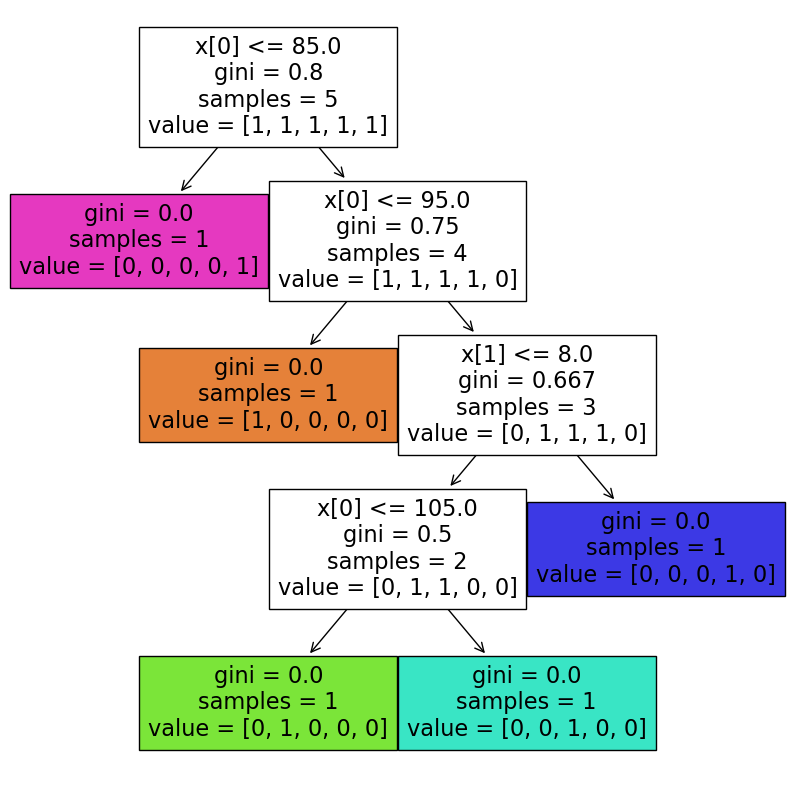

In [21]:
fig,ax = plt.subplots(figsize=(10,10))
tree.plot_tree(model,filled=True)
plt.show()

# Gradient Boosting

In [30]:
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2+0.05*np.random.randn(100)

In [31]:
df=pd.DataFrame()

In [32]:
df['X']=X.reshape(100)
df['y']=y

In [33]:
df

,X,y
0,0.074670,0.074362
1,-0.382935,0.501631
2,-0.238860,0.190432
3,0.470749,0.565756
4,0.226926,0.206149
...,...,...
95,0.489077,0.830158
96,0.240463,0.234775
97,-0.007235,-0.068381
98,-0.223849,0.107344


Text(0.5, 1.0, 'X vs y')

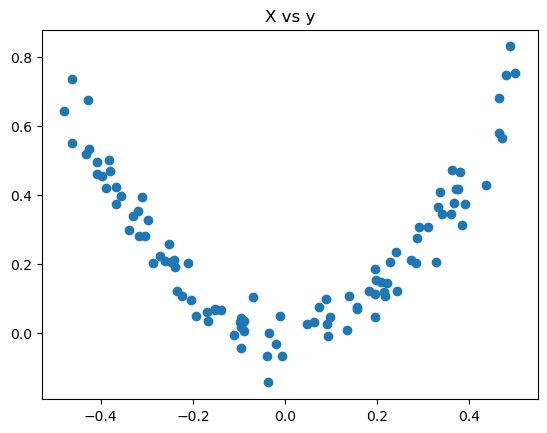

In [34]:
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

### creating base model ,i.e., prediction as avearage

In [35]:
df['pred1']=df['y'].mean()

In [36]:
df

,X,y,pred1
0,0.074670,0.074362,0.248166
1,-0.382935,0.501631,0.248166
2,-0.238860,0.190432,0.248166
3,0.470749,0.565756,0.248166
4,0.226926,0.206149,0.248166
...,...,...,...
95,0.489077,0.830158,0.248166
96,0.240463,0.234775,0.248166
97,-0.007235,-0.068381,0.248166
98,-0.223849,0.107344,0.248166


In [37]:
df['res1']=df['y']-df['pred1']

In [38]:
df.head()

,X,y,pred1,res1
0,0.074670,0.074362,0.248166,-0.173804
1,-0.382935,0.501631,0.248166,0.253464
2,-0.238860,0.190432,0.248166,-0.057734
3,0.470749,0.565756,0.248166,0.317590
4,0.226926,0.206149,0.248166,-0.042017


### ploting prediction 

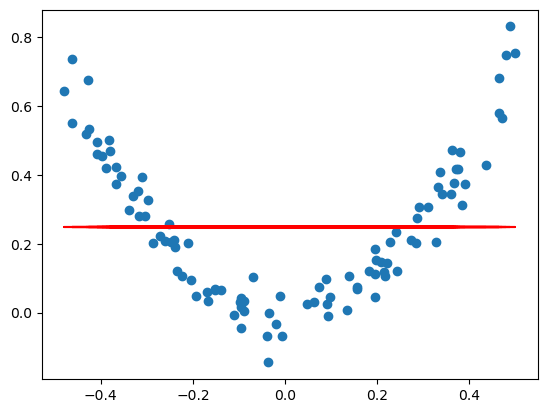

In [39]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color="red")

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [43]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values.reshape(100,1))

DecisionTreeRegressor(max_leaf_nodes=8)

In [44]:
from sklearn.tree import plot_tree

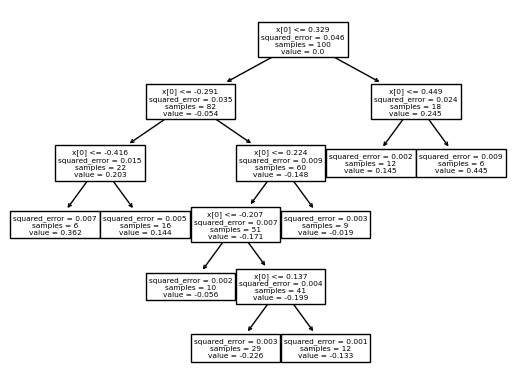

In [45]:
plot_tree(tree1)
plt.show()

In [46]:
X_test=np.linspace(-0.5,0.5,500)

In [52]:
y_pred=tree1.predict(X_test.reshape(500,1))

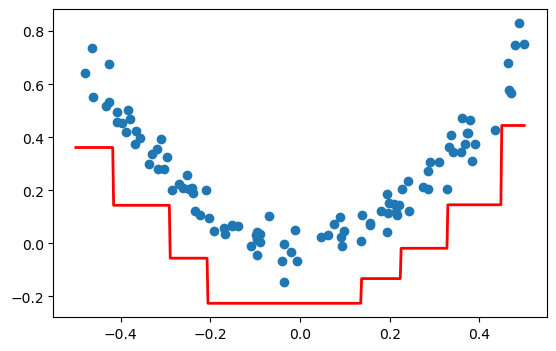

In [53]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color="red")
plt.scatter(df['X'],df['y'])